In [100]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

df = pd.read_csv("all_data.csv")
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [101]:
print(df.Country.unique())
print(df.Year.unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


In [102]:
df.describe

<bound method NDFrame.describe of      Country  Year  Life expectancy at birth (years)           GDP
0      Chile  2000                              77.3  7.786093e+10
1      Chile  2001                              77.3  7.097992e+10
2      Chile  2002                              77.8  6.973681e+10
3      Chile  2003                              77.9  7.564346e+10
4      Chile  2004                              78.0  9.921039e+10
..       ...   ...                               ...           ...
91  Zimbabwe  2011                              54.9  1.209845e+10
92  Zimbabwe  2012                              56.6  1.424249e+10
93  Zimbabwe  2013                              58.0  1.545177e+10
94  Zimbabwe  2014                              59.2  1.589105e+10
95  Zimbabwe  2015                              60.7  1.630467e+10

[96 rows x 4 columns]>

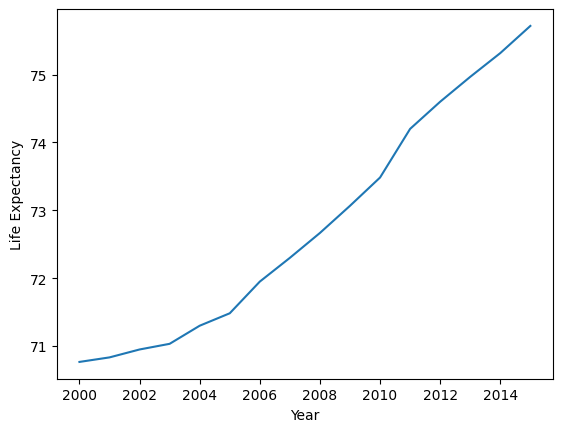

<Figure size 640x480 with 0 Axes>

In [111]:
life_byyear = df.groupby("Year")["Life expectancy at birth (years)"].mean().reset_index()

plt.plot(life_byyear["Year"], life_byyear["Life expectancy at birth (years)"])
plt.savefig("life by year.jpg")
plt.xlabel("Year")
plt.ylabel("Life Expectancy")
plt.savefig("byyear.jpg")
plt.show()
plt.clf()

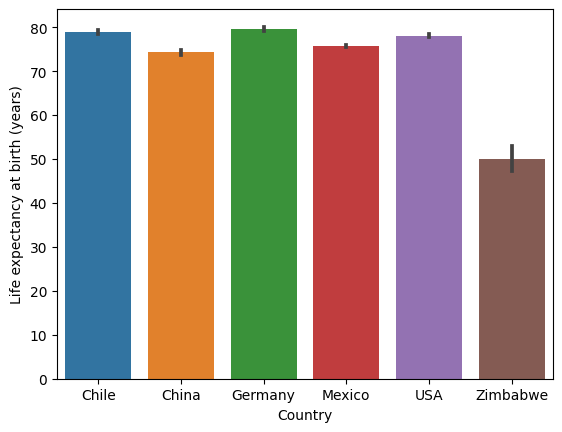

<Figure size 640x480 with 0 Axes>

In [104]:
df["Country"] = df["Country"].replace("United States of America", "USA")
sns.barplot(x="Country", y="Life expectancy at birth (years)", data=df)
plt.savefig("barplot.jpg")
plt.show()
plt.clf()

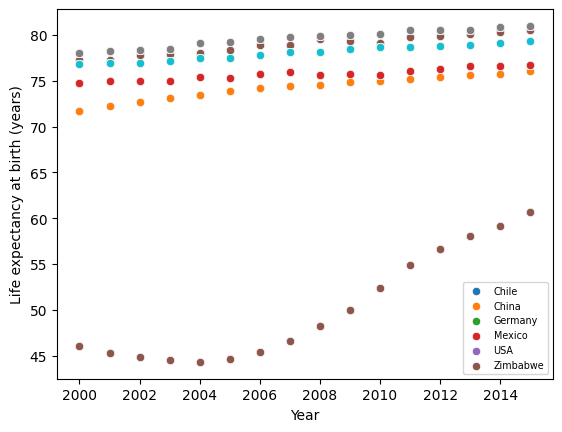

<Figure size 640x480 with 0 Axes>

In [105]:
countries = df["Country"]
country_labels = df.Country.unique()
for country in countries:
    sns.scatterplot(x="Year", y="Life expectancy at birth (years)", data=df[df["Country"] == country])
plt.legend(country_labels, loc=4, fontsize="x-small")
plt.savefig("scatterplot.jpg")
plt.savefig("life expectancy by years.jpg")
plt.show()
plt.clf()

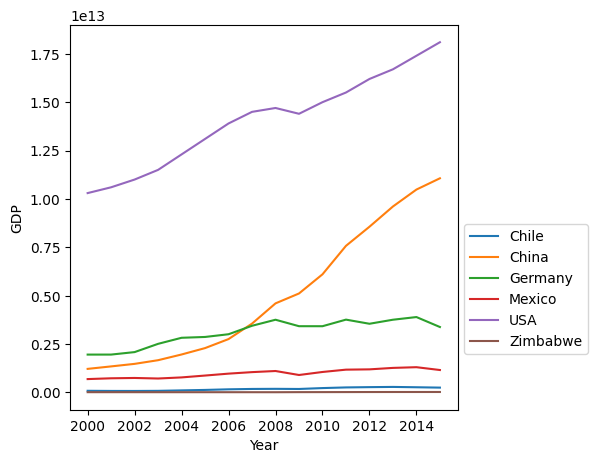

<Figure size 640x480 with 0 Axes>

In [117]:
plt.figure(figsize=(5,5))
sns.lineplot(x="Year", y="GDP", data=df, hue="Country")
plt.ylabel("GDP")
plt.legend(bbox_to_anchor=(1, 0.5))
plt.savefig("gdp by year.jpg")
plt.show()
plt.clf()

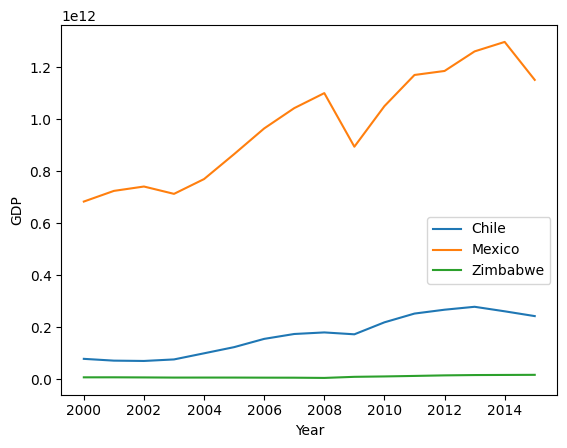

<Figure size 640x480 with 0 Axes>

In [107]:
selected_countries = ["Chile", "Zimbabwe", "Mexico"]
filtered_df = df[df['Country'].isin(selected_countries)]

sns.lineplot(x="Year", y="GDP", data=filtered_df, hue="Country")
plt.ylabel("GDP")
plt.legend(bbox_to_anchor=(1, 0.5))
plt.savefig("GDP_by_year_3_countries.jpg")
plt.show()
plt.clf()

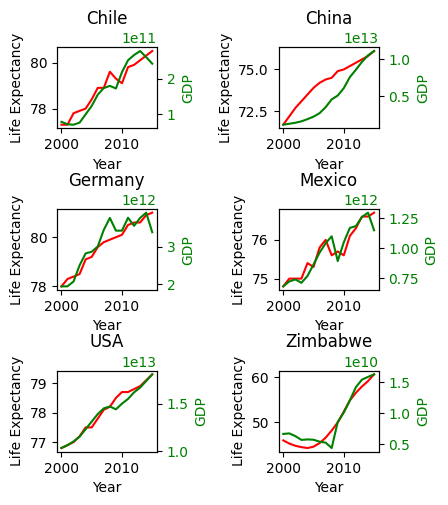

<Figure size 640x480 with 0 Axes>

In [118]:
country_names = df["Country"].unique()
plt.figure(figsize=(4.5,5))

for i, country in enumerate(country_names, 1):
    plt.subplot(3, 2, i)
    ax1 = plt.gca()
    
    ax1.plot(df["Year"][df["Country"] == country], df["Life expectancy at birth (years)"][df["Country"] == country], color="red")
    ax1.set_xlabel("Year")
    ax1.set_ylabel("Life Expectancy")
    ax1.tick_params(axis='y')
    ax1.set_title(country)

    ax2 = ax1.twinx()
    ax2.plot(df["Year"][df["Country"] == country], df["GDP"][df["Country"] == country], color='green')
    ax2.set_ylabel("GDP", color='green')
    ax2.tick_params(axis='y', labelcolor='green')
plt.tight_layout()
plt.savefig("six_countries.jpg")
plt.show()
plt.clf()

In [112]:
for country in country_names:
    mean = round(df[df["Country"] == country]["Life expectancy at birth (years)"].mean(), 2)
    print(f"{country}: {mean}")

print(df["Life expectancy at birth (years)"].mean())


Chile: 78.94
China: 74.26
Germany: 79.66
Mexico: 75.72
USA: 78.06
Zimbabwe: 50.09
72.78958333333334


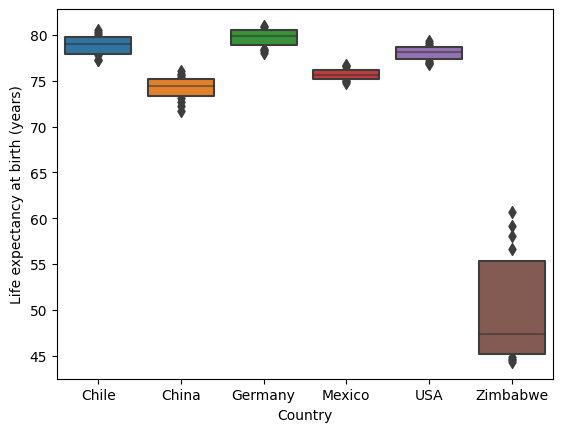

In [110]:
sns.boxenplot(data=df, x="Country", y="Life expectancy at birth (years)")
plt.show()